# Analysis of per capita $CO_2$ emission Vs Coal and Oil consumption

## Table of Contents

* [Introduction](#Introduction)  
* [Preproessing](#Preproessing)  
    * [$CO_2$](#$CO_2$)
    * [Coal and Oil](#Coal-and-Oil)
* [1. Which countries had the highest and lowest average per capita $CO_2$ emission, coal  and oil consumption in last 10 years?](#1.-Which-countries-had-the-highest-and-lowest-average-per-capita-$CO_2$-emission,-coal--and-oil-consumption-in-last-10-years?)  
* [2. Trend of common countries in above top-10 and bottom-10 graphs](#2.-Trend-of-common-countries-in-above-top-10-and-bottom-10-graphs)  
* [3. Which countries have shown the highest change in $CO_2$ emission, coal and oil consumption in the last 10 years?](#3.-Which-countries-have-shown-the-highest-change-in-$CO_2$-emission,-coal-and-oil-consumption-in-the-last-10-years?) 
* [4. Trend of per capita $𝐶𝑂_2$ emission, Coal and Oil consumption of most populous countries](#4.-Trend-of-per-capita-$CO_2$-emission,-Coal-and-Oil-consumption-of-most-populous-countries)
* [Limitations](#Limitations)
* [Final Conclusion](#Final-Conclusion)

# Introduction

This project analyzes the $CO_2$ emissions  and compare it with Coal and Oil consumption. The datasets are taken from [Gapminder](https://www.gapminder.org/data/).

* **$CO_2$ emission:** The dataset contains yearly per capita $CO_2$ emissions from the burning of fossil fuels (metric tonnes of $CO_2$ per person).
* **Coal consumption:**  This dataset contains yearly per capita coal consumption in tonnes.
* **Oil consumption:** This dataset contains yearly per capita oil consumption in tonnes per year per person.

# Preproessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline

In [2]:
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_coal = pd.read_csv('coal_consumption_per_cap.csv')
df_oil = pd.read_csv('oil_consumption_per_cap.csv')

### $CO_2$

In [3]:
temp = df_co2.iloc[:, -10:]
# temp['country'] = df_co2['country']
temp.insert(0, 'country', df_co2['country'])
df_co2 = temp
df_co2.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [4]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  192 non-null    object 
 1   2005     190 non-null    float64
 2   2006     190 non-null    float64
 3   2007     191 non-null    float64
 4   2008     191 non-null    float64
 5   2009     191 non-null    float64
 6   2010     191 non-null    float64
 7   2011     191 non-null    float64
 8   2012     192 non-null    float64
 9   2013     192 non-null    float64
 10  2014     192 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.6+ KB


In [5]:
df_co2.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,190.000000,190.000000,191.000000,191.000000,191.000000,191.000000,191.000000,192.000000,192.000000,192.000000
mean,4.632572,4.696715,4.700221,4.720091,4.506879,4.604666,4.550413,4.526914,4.465214,4.440085
std,6.738075,6.943929,6.706373,6.494926,6.157124,6.175062,6.099754,6.145365,5.861904,6.065368
min,0.020800,0.024400,0.023600,0.023200,0.022500,0.024300,0.026800,0.030300,0.030200,0.044500
25%,0.630250,0.611500,0.595500,0.587500,0.540500,0.607000,0.636500,0.613750,0.669500,0.659000
50%,2.140000,2.210000,2.230000,2.340000,2.400000,2.410000,2.410000,2.470000,2.420000,2.265000
75%,6.545000,6.425000,6.435000,6.535000,5.865000,6.120000,6.220000,6.100000,5.832500,5.695000
max,58.900000,62.800000,53.200000,46.700000,43.500000,40.700000,41.200000,44.600000,37.800000,45.400000


In [6]:
# check if any row duplicate
sum(df_co2.duplicated())

0

In [7]:
countries = df_co2['country'].tolist()
year = df_co2.columns.values.tolist()[1:]
print(f'No of countries: {len(countries)}')
print(f'Years: {min(year)}-{max(year)}')

No of countries: 192
Years: 2005-2014


In [8]:
# transpose rows with columns
df_co2 = df_co2.T
# make first row as header
df_co2.columns = df_co2.iloc[0]
df_co2 = df_co2[1:]
# # change Ist column name
# df.reset_index(level=0, inplace=True)
# df.rename(columns={'index': 'year'}, inplace=True)

In [9]:
df_co2.isnull().sum().sort_values(ascending=False)

country
South Sudan        7
Liechtenstein      2
Zimbabwe           0
France             0
Guinea             0
                  ..
North Macedonia    0
North Korea        0
Nigeria            0
Niger              0
Afghanistan        0
Length: 192, dtype: int64

In [10]:
# replace NaN with 0s
df_co2.fillna(0, inplace=True)

In [11]:
df_co2.describe()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000
mean,0.226900,1.562000,3.326000,6.27600,1.205000,5.256000,4.498000,1.705000,17.280000,7.897000,...,7.807000,17.740000,2.13500,3.993000,0.443100,6.210000,1.47100,0.943200,0.207700,0.66520
std,0.128897,0.223845,0.207643,0.47575,0.100582,0.240056,0.173833,0.210357,0.897899,0.699223,...,0.876002,1.274711,0.29247,0.418199,0.116275,0.251926,0.22343,0.100949,0.043876,0.14262
min,0.052900,1.280000,2.990000,5.83000,0.980000,4.810000,4.140000,1.460000,15.400000,6.800000,...,6.460000,16.300000,1.74000,3.440000,0.222000,5.810000,1.16000,0.749000,0.152000,0.40600
25%,0.102550,1.400000,3.197500,5.90500,1.185000,5.152500,4.415000,1.487500,17.075000,7.355000,...,7.140000,16.625000,1.91000,3.682500,0.420750,6.040000,1.25500,0.889750,0.185250,0.55725
50%,0.268000,1.520000,3.295000,6.12000,1.235000,5.360000,4.510000,1.720000,17.550000,7.860000,...,7.655000,17.350000,2.11500,3.915000,0.454500,6.190000,1.52000,0.983500,0.192000,0.70350
75%,0.311750,1.717500,3.450000,6.49750,1.250000,5.410000,4.592500,1.900000,17.800000,8.362500,...,8.547500,18.950000,2.37250,4.415000,0.521000,6.342500,1.61000,0.998500,0.238250,0.77900
max,0.412000,1.960000,3.720000,7.30000,1.330000,5.540000,4.750000,1.980000,18.200000,8.990000,...,9.000000,19.600000,2.56000,4.470000,0.595000,6.650000,1.80000,1.070000,0.288000,0.83200


### Coal and Oil

In [12]:
df_coal.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,...,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458,0.00361,0.00356
1,Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,...,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460,0.03130,0.02410
2,Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,...,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000,1.85000,1.82000
3,Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,...,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700,0.37300,0.36400
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017,0.00004,0.00004


In [13]:
temp = df_coal.iloc[:, -12:-2]
temp.insert(0, 'country', df_coal['country'])
df_coal = temp
df_coal.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Algeria,0.01780,0.02610,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458
1,Argentina,0.02880,0.02670,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460
2,Australia,2.56000,2.58000,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000
3,Austria,0.48500,0.49100,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700
4,Azerbaijan,0.00038,0.00037,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017


In [14]:
temp = df_oil.iloc[:, -12:-2]
temp.insert(0, 'country', df_oil['country'])
df_oil = temp
df_oil.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Algeria,0.331,0.341,0.376,0.402,0.419,0.411,0.430,0.448,0.458,0.452
1,Argentina,0.530,0.550,0.605,0.616,0.596,0.681,0.679,0.703,0.749,0.729
2,Australia,1.950,2.080,2.030,2.020,2.000,1.980,2.060,2.100,2.080,2.050
3,Austria,1.700,1.710,1.620,1.600,1.530,1.590,1.500,1.470,1.480,1.440
4,Azerbaijan,0.630,0.557,0.519,0.407,0.371,0.356,0.436,0.450,0.484,0.468


In [15]:
# transpose rows with columns
df_coal = df_coal.T
df_coal.columns = df_coal.iloc[0]
df_coal = df_coal[1:]

# oil
df_oil = df_oil.T
df_oil.columns = df_oil.iloc[0]
df_oil = df_oil[1:]

In [16]:
# NaNs
df_coal.isnull().sum().sum(), df_oil.isnull().sum().sum()

(0, 0)

---
# 1. Which countries had the highest and lowest average per capita $CO_2$ emission, coal  and oil consumption in last 10 years?

In [17]:
# average of per capita emission in each country
co2_mean10 = df_co2.mean().sort_values(ascending=False)[:10]
# top 10 countries having coal and oil consumption
coal_mean10 = df_coal.mean().sort_values(ascending=False)[:10]
oil_mean10 = df_oil.mean().sort_values(ascending=False)[:10]

Text(0.5, 1.0, '10-year average top-10 per capita oil consumption')

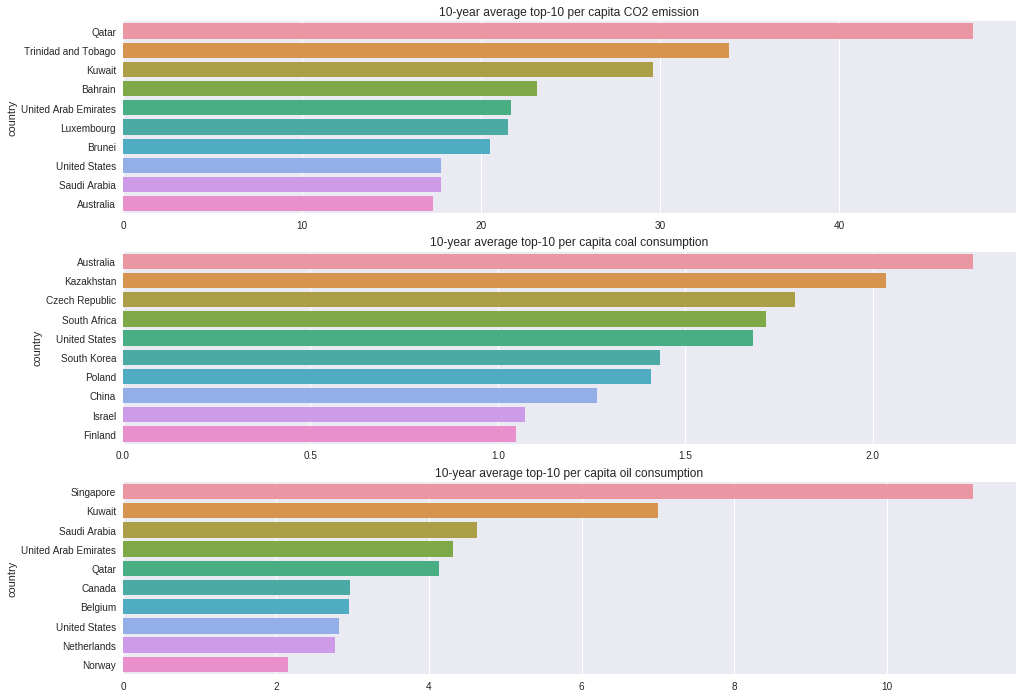

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(16, 12))
p1 = sns.barplot(co2_mean10.values, co2_mean10.index, ax=ax[0])
p2 = sns.barplot(coal_mean10.values, coal_mean10.index, ax=ax[1])
p3 = sns.barplot(oil_mean10.values, oil_mean10.index, ax=ax[2])
ax[0].set_title('10-year average top-10 per capita CO2 emission')
ax[1].set_title('10-year average top-10 per capita coal consumption')
ax[2].set_title('10-year average top-10 per capita oil consumption')

Text(0.5, 1.0, '10-year average bottom-10 per capita oil consumption')

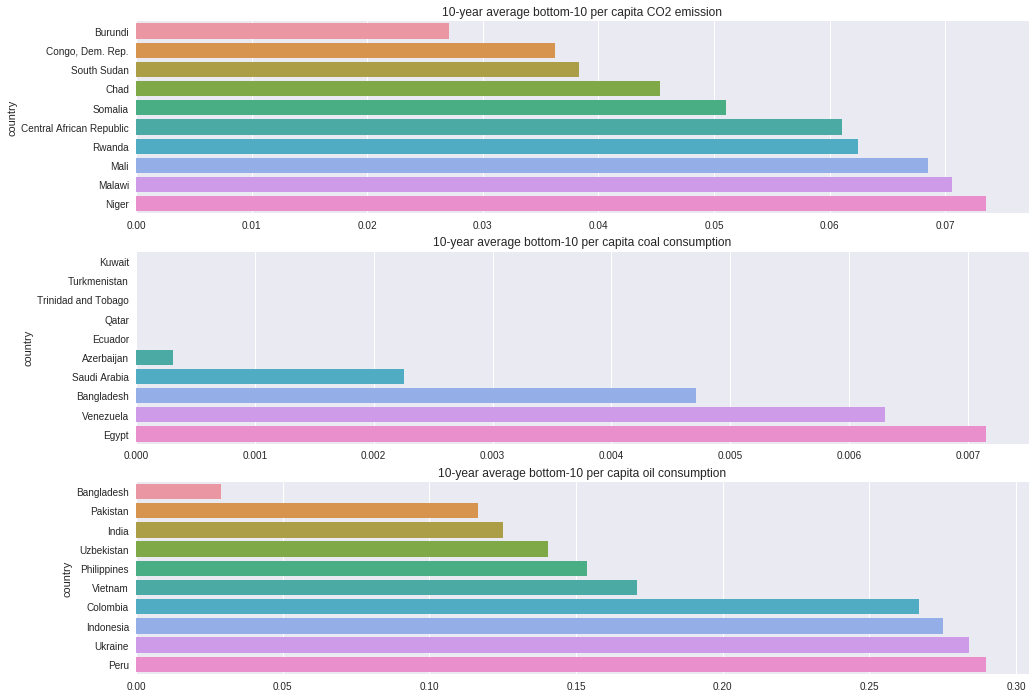

In [19]:
# Lowest per captia CO2 emission, coal and oil consumption
co2_mean10_b = df_co2.mean().sort_values(ascending=True)[:10]
# top 10 countries having coal and oil consumption
coal_mean10_b = df_coal.mean().sort_values(ascending=True)[:10]
oil_mean10_b = df_oil.mean().sort_values(ascending=True)[:10]

fig, ax = plt.subplots(3, 1, figsize=(16, 12))
p1 = sns.barplot(co2_mean10_b.values, co2_mean10_b.index, ax=ax[0])
p2 = sns.barplot(coal_mean10_b.values, coal_mean10_b.index, ax=ax[1])
p3 = sns.barplot(oil_mean10_b.values, oil_mean10_b.index, ax=ax[2])
ax[0].set_title('10-year average bottom-10 per capita CO2 emission')
ax[1].set_title('10-year average bottom-10 per capita coal consumption')
ax[2].set_title('10-year average bottom-10 per capita oil consumption')

**Conclusion:**

Qatar, Australia, Singapore had the highest average $CO_2$ emission, coal consumption, and oil consumption respectively. It can also be noted that some countries overlap in the above plots e.g. Qatar has high $CO_2$ emission as well as high oil consumption.

Burundi has the lowest average $CO_2$ emission per capita in the last 10 years. There is no common country in the bottom-10 graphs.

---
# 2. Trend of common countries in above top-10 and bottom-10 graphs

In [20]:
# common countries
common1 = set(co2_mean10.index).intersection(set(coal_mean10.index))
common2 = set(co2_mean10.index).intersection(set(oil_mean10.index))
common_c = common1.union(common2)
common_c

{'Australia',
 'Kuwait',
 'Qatar',
 'Saudi Arabia',
 'United Arab Emirates',
 'United States'}

In [21]:
# all countries
all_c = set(co2_mean10.index).union(set(coal_mean10.index)).union(set(oil_mean10.index))

In [22]:
# calculate correlation
for country in common_c:
    cor = df_co2[country].corr(df_oil[country].astype('float64'))
    print(f'{country}: {cor:.2}')

Australia: -0.37
United Arab Emirates: 0.85
United States: 0.98
Kuwait: 0.89
Qatar: 0.61
Saudi Arabia: 0.81


In [23]:
# remove countries not common in datasets
all_c.remove('Bahrain')
all_c.remove('Brunei')
all_c.remove('Luxembourg')

In [24]:
corr_dict = {}
for country in all_c:
    cor = df_co2[country].corr(df_oil[country].astype('float64'))
    corr_dict[country] = cor
# sort corr_dict by values
corr_dict = {k: v for k, v in sorted(corr_dict.items(), key=lambda item: item[1], reverse=True)}

In [25]:
# print top 6 correlated countries
corr_top6 = list(corr_dict.keys())[:6]
corr_top6

['United States',
 'China',
 'Czech Republic',
 'Kuwait',
 'Belgium',
 'United Arab Emirates']

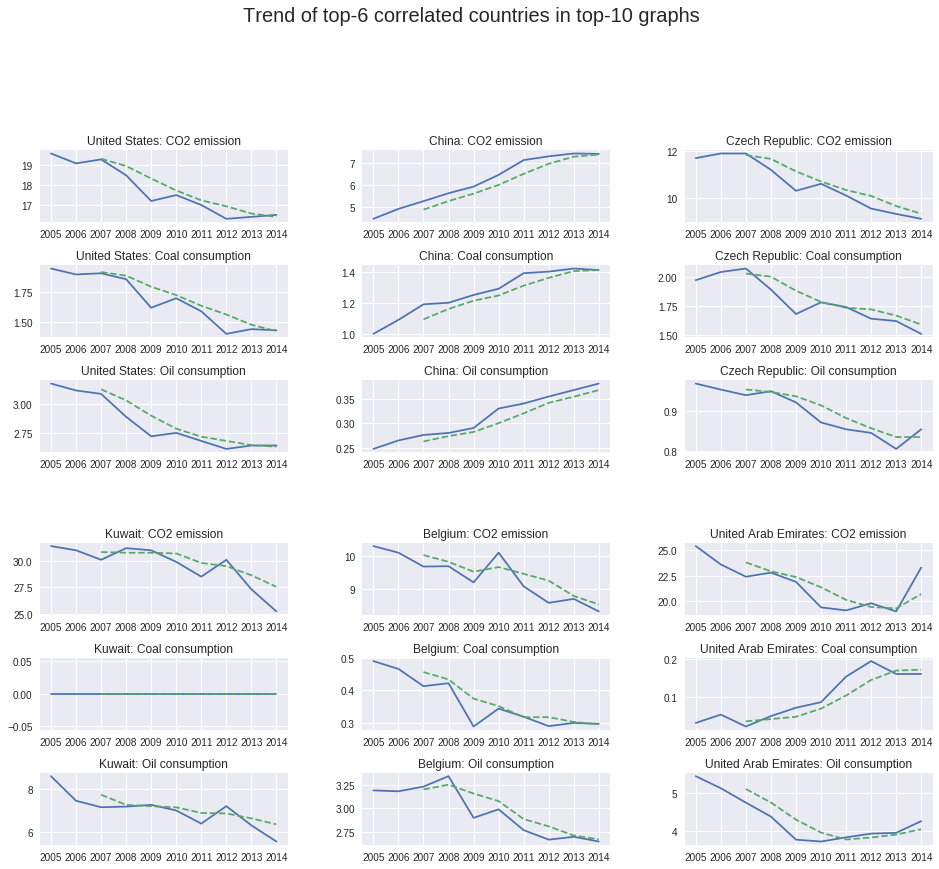

In [26]:
fig = plt.figure(figsize=(16, 20))
fig.suptitle('Trend of top-6 correlated countries in top-10 graphs', size=20)
outer = gridspec.GridSpec(3, 3, wspace=0.3, hspace=0.3)

for i, country in enumerate(corr_top6):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.6)
    for j, (dataset, name) in enumerate(zip([df_co2, df_coal, df_oil], ['CO2 emission', 'Coal consumption', 'Oil consumption'])):
        ax = plt.Subplot(fig, inner[j])
        # plot trend
        ax.plot(dataset.index, dataset[country].astype('float64'))
        # calculate moving average
        moving_avg = dataset[country].rolling(window=3).mean().iloc[3-1:]
        ax.plot(moving_avg, '--')
        ax.set_title(f'{country}: {name}')
        fig.add_subplot(ax)

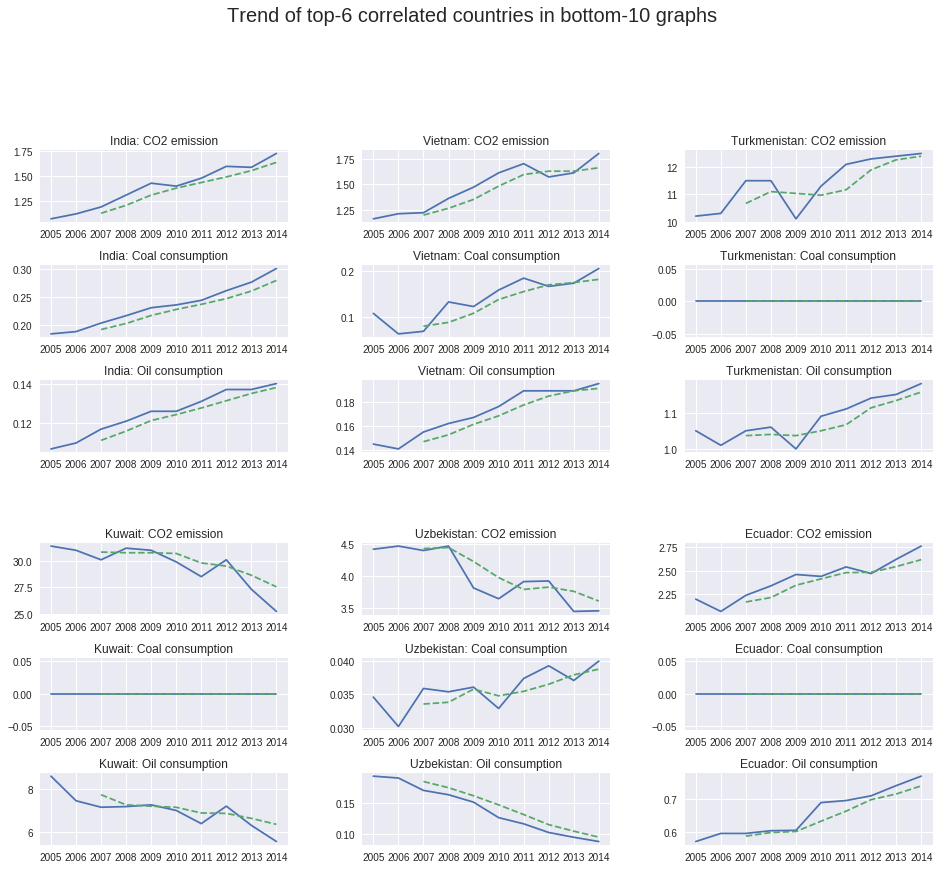

In [27]:
# all countries
all_c = set(co2_mean10_b.index).union(set(coal_mean10_b.index)).union(set(oil_mean10_b.index))

# remove uncommon countires
all_c.remove('Mali')
all_c.remove('Central African Republic')
all_c.remove('South Sudan')
all_c.remove('Rwanda')
all_c.remove('Chad')
all_c.remove('Malawi')
all_c.remove('Niger')
all_c.remove('Burundi')
all_c.remove('Congo, Dem. Rep.')
all_c.remove('Somalia')

corr_dict = {}
for country in all_c:
    cor = df_co2[country].corr(df_oil[country].astype('float64'))
    corr_dict[country] = cor
# sort corr_dict by values
corr_dict = {k: v for k, v in sorted(corr_dict.items(), key=lambda item: item[1], reverse=True)}

# print top 6 correlated countries
corr_top6 = list(corr_dict.keys())[:6]

fig = plt.figure(figsize=(16, 20))
fig.suptitle('Trend of top-6 correlated countries in bottom-10 graphs', size=20)
outer = gridspec.GridSpec(3, 3, wspace=0.3, hspace=0.3)

for i, country in enumerate(corr_top6):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.6)
    for j, (dataset, name) in enumerate(zip([df_co2, df_coal, df_oil], ['CO2 emission', 'Coal consumption', 'Oil consumption'])):
        ax = plt.Subplot(fig, inner[j])
        # plot trend
        ax.plot(dataset.index, dataset[country].astype('float64'))
        # calculate moving average
        moving_avg = dataset[country].rolling(window=3).mean().iloc[3-1:]
        ax.plot(moving_avg, '--')
        ax.set_title(f'{country}: {name}')
        fig.add_subplot(ax)

**Conclusion:**

**Trend of countries in top-10 graphs:**  
Following the absolute and moving average curves, it can be said that the countries above show similar trend in $CO_2$ emission, Coal consumption, and Oil consumption. It can be inferred that countries having high coal and oil consumption have high $CO_2$ emission.

One notable exception is United Arab Emirates where the trend in $CO_2$ emission is opposite to that in coal consumption, though is still similar to oil consumption.

**Trend of countries in bottom-10 graphs:**  
India has the highest correlation in bottom-10 countries. By looking at the slope of the curves, it can be said that all the countries have positive correlation except Uzbekistan, which has negative correlation between $CO_2$ emission and coal consumption.

--- 
# 3. Which countries have shown the highest change in $CO_2$ emission, coal and oil consumption in the last 10 years?

In [28]:
# CO2 emissions in last 10 years
df_co2.style.background_gradient(cmap='Reds')

In [29]:
# coal consumption in last 10 years
df_coal.astype('float64').style.background_gradient(cmap='Purples')

country,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,Czech Republic,Denmark,Ecuador,Egypt,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Kazakhstan,Kuwait,Lithuania,Malaysia,Mexico,Netherlands,New Zealand,Norway,Pakistan,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Saudi Arabia,Singapore,Slovak Republic,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Vietnam
2005,0.017800,0.028800,2.560000,0.485000,0.000380,0.003350,0.071300,0.490000,0.069500,0.897000,0.931000,0.171000,1.000000,0.030900,1.970000,0.684000,0.000000,0.011100,0.902000,0.219000,0.995000,0.791000,0.301000,0.185000,0.107000,0.022100,0.634000,1.200000,0.280000,0.889000,1.730000,0.000000,0.055300,0.268000,0.106000,0.495000,0.553000,0.156000,0.024400,0.033400,0.053200,1.440000,0.316000,0.000000,0.410000,0.659000,0.001170,0.001870,0.784000,1.640000,1.120000,0.466000,0.291000,0.019500,0.177000,0.000000,0.326000,0.000000,0.800000,0.031800,0.621000,1.950000,0.034600,0.001390,0.107000
2006,0.026100,0.026700,2.580000,0.491000,0.000370,0.003240,0.064200,0.466000,0.067800,0.914000,0.893000,0.211000,1.090000,0.084800,2.040000,1.030000,0.000000,0.010900,1.400000,0.201000,1.040000,0.743000,0.306000,0.189000,0.126000,0.021100,0.554000,1.160000,0.282000,0.875000,1.810000,0.000000,0.076000,0.279000,0.112000,0.469000,0.537000,0.133000,0.025300,0.028000,0.057200,1.500000,0.312000,0.000000,0.448000,0.677000,0.000810,0.001080,0.825000,1.650000,1.120000,0.400000,0.296000,0.020800,0.188000,0.000000,0.381000,0.000000,0.854000,0.053700,0.673000,1.900000,0.030200,0.009090,0.062300
2007,0.022100,0.030500,2.510000,0.470000,0.000140,0.004200,0.072800,0.413000,0.071100,1.040000,0.917000,0.248000,1.190000,0.072800,2.070000,0.851000,0.000000,0.009730,1.320000,0.207000,1.070000,0.776000,0.313000,0.204000,0.155000,0.021700,0.534000,1.160000,0.275000,0.916000,1.970000,0.000000,0.076500,0.332000,0.101000,0.509000,0.405000,0.144000,0.033900,0.036600,0.060500,1.460000,0.270000,0.000000,0.482000,0.656000,0.002200,0.001710,0.741000,1.680000,1.220000,0.441000,0.292000,0.023100,0.211000,0.000000,0.423000,0.000000,0.857000,0.022400,0.625000,1.910000,0.035900,0.005010,0.067900
2008,0.021700,0.034500,2.570000,0.450000,0.000790,0.004310,0.068100,0.422000,0.071300,1.010000,0.880000,0.262000,1.200000,0.109000,1.890000,0.745000,0.000000,0.008600,1.000000,0.194000,0.988000,0.729000,0.306000,0.217000,0.133000,0.016100,0.506000,1.110000,0.265000,0.936000,2.110000,0.000000,0.065900,0.361000,0.088900,0.480000,0.496000,0.147000,0.036600,0.032200,0.070000,1.440000,0.236000,0.000000,0.461000,0.704000,0.002470,0.001010,0.743000,1.850000,1.340000,0.294000,0.263000,0.020500,0.227000,0.000000,0.420000,0.000000,0.905000,0.049800,0.574000,1.860000,0.035400,0.005010,0.132000
2009,0.013700,0.023400,2.440000,0.344000,0.000460,0.005150,0.065000,0.289000,0.057000,0.858000,0.695000,0.237000,1.250000,0.088100,1.680000,0.729000,0.000000,0.007510,1.010000,0.171000,0.886000,0.736000,0.258000,0.231000,0.139000,0.018400,0.429000,1.060000,0.207000,0.790000,1.910000,0.000000,0.053100,0.385000,0.089100,0.451000,0.373000,0.116000,0.029500,0.028600,0.065700,1.350000,0.268000,0.000000,0.366000,0.644000,0.000880,0.000810,0.718000,1.840000,1.390000,0.203000,0.207000,0.019100,0.226000,0.000000,0.433000,0.000000,0.780000,0.071900,0.475000,1.620000,0.036100,0.008300,0.122000
2010,0.008580,0.030800,2.230000,0.402000,0.000060,0.005320,0.068100,0.344000,0.073500,0.931000,0.725000,0.264000,1.290000,0.102000,1.780000,0.690000,0.000000,0.005520,1.260000,0.183000,0.953000,0.687000,0.275000,0.236000,0.163000,0.017200,0.429000,1.040000,0.229000,0.900000,2.040000,0.000000,0.066300,0.526000,0.109000,0.452000,0.320000,0.156000,0.027200,0.027700,0.074900,1.440000,0.155000,0.000000,0.343000,0.632000,0.002460,0.001540,0

In [30]:
# oil consumption in last 10 years
df_oil.astype('float64').style.background_gradient(cmap='Blues')

country,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,Czech Republic,Denmark,Ecuador,Egypt,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Kazakhstan,Kuwait,Lithuania,Malaysia,Mexico,Netherlands,New Zealand,Norway,Pakistan,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Saudi Arabia,Singapore,Slovak Republic,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Vietnam
2005,0.331000,0.530000,1.950000,1.700000,0.630000,0.027000,0.782000,3.190000,0.530000,0.629000,3.090000,0.772000,0.249000,0.251000,0.969000,1.690000,0.573000,0.388000,2.110000,1.520000,1.500000,1.780000,0.729000,0.107000,0.271000,1.140000,2.210000,1.850000,1.470000,1.930000,0.600000,8.580000,0.830000,1.090000,0.837000,3.060000,1.690000,2.190000,0.099000,0.258000,0.172000,0.584000,1.550000,4.120000,0.490000,0.871000,3.940000,9.220000,0.709000,0.509000,2.150000,1.800000,1.900000,1.650000,0.701000,1.300000,0.452000,1.050000,0.291000,5.450000,1.390000,3.180000,0.194000,1.060000,0.145000
2006,0.341000,0.550000,2.080000,1.710000,0.557000,0.027000,0.919000,3.180000,0.529000,0.652000,3.020000,0.854000,0.266000,0.248000,0.954000,1.720000,0.597000,0.367000,2.020000,1.510000,1.520000,1.870000,0.771000,0.110000,0.254000,1.230000,2.160000,1.740000,1.470000,1.850000,0.679000,7.440000,0.849000,1.100000,0.814000,3.090000,1.700000,2.240000,0.112000,0.245000,0.151000,0.609000,1.380000,4.590000,0.485000,0.910000,4.000000,9.650000,0.635000,0.512000,2.140000,1.770000,1.900000,1.680000,0.671000,1.410000,0.466000,1.010000,0.305000,5.130000,1.370000,3.120000,0.191000,1.160000,0.141000
2007,0.376000,0.605000,2.030000,1.620000,0.519000,0.025200,0.841000,3.230000,0.563000,0.639000,3.080000,1.090000,0.277000,0.242000,0.940000,1.720000,0.597000,0.384000,2.040000,1.480000,1.380000,1.880000,0.772000,0.117000,0.265000,1.240000,2.140000,1.780000,1.420000,1.800000,0.732000,7.140000,0.855000,1.160000,0.823000,3.070000,1.690000,2.260000,0.119000,0.251000,0.155000,0.631000,1.390000,4.410000,0.491000,0.908000,4.130000,10.200000,0.673000,0.517000,2.190000,1.770000,1.840000,1.500000,0.687000,1.610000,0.468000,1.050000,0.311000,4.750000,1.310000,3.090000,0.171000,1.070000,0.155000
2008,0.402000,0.616000,2.020000,1.600000,0.407000,0.025300,0.832000,3.340000,0.602000,0.636000,3.010000,1.120000,0.281000,0.260000,0.950000,1.690000,0.605000,0.403000,2.000000,1.460000,1.470000,1.780000,0.750000,0.121000,0.254000,1.280000,2.010000,1.690000,1.350000,1.750000,0.717000,7.170000,0.952000,1.090000,0.806000,2.850000,1.690000,2.170000,0.119000,0.279000,0.146000,0.660000,1.320000,4.510000,0.499000,0.934000,4.410000,10.600000,0.729000,0.485000,2.090000,1.700000,1.800000,1.580000,0.667000,1.710000,0.456000,1.060000,0.307000,4.380000,1.280000,2.890000,0.164000,1.200000,0.162000
2009,0.419000,0.596000,2.000000,1.530000,0.371000,0.023400,0.978000,2.900000,0.600000,0.576000,2.790000,1.080000,0.291000,0.235000,0.922000,1.490000,0.606000,0.417000,1.880000,1.400000,1.410000,1.700000,0.709000,0.126000,0.254000,1.250000,1.760000,1.490000,1.260000,1.560000,0.574000,7.250000,0.830000,1.060000,0.766000,2.760000,1.590000,2.220000,0.124000,0.281000,0.151000,0.659000,1.230000,3.790000,0.446000,0.896000,4.720000,11.200000,0.691000,0.474000,2.100000,1.580000,1.660000,1.580000,0.686000,1.620000,0.457000,1.000000,0.294000,3.770000,1.210000,2.720000,0.152000,1.200000,0.167000
2010,0.411000,0.681000,1.980000,1.590000,0.356000,0.025700,0.789000,2.990000,0.644000,0.525000,2.960000,0.942000,0.330000,0.260000,0.872000,1.500000,0.688000,0.432000,1.970000,1.340000,1.430000,1.580000,0.674000,0.126000,0.267000,1.120000,1.650000,1.510000,1.220000,1.580000,0.602000,6.990000,0.863000,1.040000,0.755000,2.750000,1.610000,2.200000,0.120000,0.293000,0.156000,0.697000,1.220000,3.640000,0.428000,0.931000,5.000000,12.0000

In [31]:
# change from the year in which cases were reported for all countries: 2012
change_co2 = df_co2.iloc[[-5, -1]]
# append difference row
diff = df_co2.iloc[-1] - df_co2.iloc[-5]
diff.name = 'diff'
change_co2 = change_co2.append(diff)

# change from the year in which cases were reported for all countries: 2012
change_coal = df_coal.iloc[[-5, -1]]
# append difference row
diff = df_coal.iloc[-1] - df_coal.iloc[-5]
diff.name = 'diff'
change_coal = change_coal.append(diff)

# change from the year in which cases were reported for all countries: 2012
change_oil = df_oil.iloc[[-5, -1]]
# append difference row
diff = df_oil.iloc[-1] - df_oil.iloc[-5]
diff.name = 'diff'
change_oil = change_oil.append(diff)

In [32]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for negative
    strings, red otherwise.
    """
    color = 'green' if val < 0 else 'red'
    return 'background-color: %s' % color

In [33]:
# CO2 emission decrease shown in green, increase shown in red
change_co2.style.applymap(color_negative_red, subset=pd.IndexSlice['diff',])

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyz Republic,Lao,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
2010,0.294000,1.560000,3.300000,6.120000,1.240000,5.540000,4.560000,1.470000,17.700000,8.030000,3.400000,4.580000,23.600000,0.394000,5.290000,6.650000,10.100000,1.680000,0.553000,0.670000,1.530000,5.720000,2.330000,2.130000,21.100000,5.960000,0.126000,0.024300,0.350000,0.340000,15.600000,1.110000,0.059300,0.043500,4.250000,6.450000,1.660000,0.234000,0.031300,0.451000,1.670000,0.342000,4.660000,3.390000,6.930000,10.600000,8.400000,0.607000,1.950000,2.120000,2.440000,2.410000,1.050000,4.920000,0.117000,13.600000,0.075100,1.420000,11.600000,5.600000,2.930000,0.256000,1.490000,9.380000,0.406000,7.330000,2.490000,0.797000,0.241000,0.153000,2.300000,0.213000,0.973000,5.060000,6.120000,1.400000,1.770000,7.680000,3.650000,8.660000,9.280000,6.790000,2.590000,9.110000,2.950000,15.200000,0.294000,0.607000,29.900000,1.180000,0.262000,3.810000,4.620000,1.120000,0.201000,10.000000,1.530000,4.310000,21.600000,0.092600,0.075400,7.770000,2.570000,0.064000,6.150000,1.960000,0.620000,3.140000,3.960000,1.100000,1.210000,5.090000,4.140000,1.730000,0.113000,0.250000,1.430000,4.390000,0.187000,11.000000,7.270000,0.791000,0.071400,0.577000,2.700000,4.150000,12.300000,15.600000,0.946000,12.400000,0.500000,2.520000,0.670000,0.821000,1.960000,0.905000,8.250000,4.520000,40.700000,3.890000,11.700000,0.057600,1.000000,0.566000,18.900000,0.600000,5.090000,4.850000,0.112000,11.000000,6.710000,7.500000,0.375000,0.050800,9.190000,11.400000,0.000000,5.790000,0.657000,4.280000,2.340000,2.010000,0.464000,4.570000,0.863000,5.540000,4.980000,2.930000,0.333000,0.154000,4.190000,0.212000,0.406000,1.130000,36.100000,2.600000,4.120000,11.300000,0.696000,0.116000,6.650000,19.400000,7.790000,17.500000,1.890000,3.640000,0.512000,6.510000,1.610000,0.993000,0.194000,0.552000
2014,0.299000,1.960000,3.720000,5.830000,1.290000,5.380000,4.750000,1.900000,15.400000,6.800000,3.940000,6.320000,23.400000,0.459000,4.490000,6.690000,8.320000,1.410000,0.614000,1.290000,1.930000,6.230000,3.240000,2.590000,22.100000,5.870000,0.162000,0.044500,0.438000,0.315000,15.100000,0.933000,0.066600,0.053800,4.690000,7.400000,1.760000,0.203000,0.063400,0.635000,1.630000,0.490000,3.96000

In [34]:
# Coal consumption decrease shown in green, increase shown in red
change_coal.style.applymap(color_negative_red, subset=pd.IndexSlice['diff',])

country,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,Czech Republic,Denmark,Ecuador,Egypt,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Kazakhstan,Kuwait,Lithuania,Malaysia,Mexico,Netherlands,New Zealand,Norway,Pakistan,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Saudi Arabia,Singapore,Slovak Republic,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Vietnam
2010,0.008580,0.030800,2.230000,0.402000,0.000060,0.005320,0.068100,0.344000,0.073500,0.931000,0.725000,0.264000,1.290000,0.102000,1.780000,0.690000,0.000000,0.005520,1.260000,0.183000,0.953000,0.687000,0.275000,0.236000,0.163000,0.017200,0.429000,1.040000,0.229000,0.900000,2.040000,0.000000,0.066300,0.526000,0.109000,0.452000,0.320000,0.156000,0.027200,0.027700,0.074900,1.440000,0.155000,0.000000,0.343000,0.632000,0.002460,0.001540,0.721000,1.800000,1.530000,0.147000,0.265000,0.018900,0.231000,0.000000,0.435000,0.000000,0.835000,0.086600,0.489000,1.700000,0.032900,0.006870,0.158000
2014,0.004580,0.034600,1.820000,0.347000,0.000170,0.004880,0.083000,0.297000,0.085800,0.886000,0.554000,0.432000,1.410000,0.110000,1.510000,0.464000,0.000000,0.004290,0.818000,0.135000,0.977000,0.594000,0.226000,0.300000,0.177000,0.020700,0.433000,0.866000,0.219000,0.930000,2.340000,0.000000,0.076800,0.508000,0.102000,0.536000,0.321000,0.165000,0.025500,0.028100,0.106000,1.290000,0.256000,0.000000,0.288000,0.609000,0.004580,0.071300,0.630000,1.650000,1.680000,0.250000,0.217000,0.017100,0.262000,0.000000,0.469000,0.000000,0.793000,0.161000,0.457000,1.430000,0.040000,0.006410,0.205000
diff,-0.004000,0.003800,-0.410000,-0.055000,0.000110,-0.000440,0.014900,-0.047000,0.012300,-0.045000,-0.171000,0.168000,0.120000,0.008000,-0.270000,-0.226000,0.000000,-0.001230,-0.442000,-0.048000,0.024000,-0.093000,-0.049000,0.064000,0.014000,0.003500,0.004000,-0.174000,-0.010000,0.030000,0.300000,0.000000,0.010500,-0.018000,-0.007000,0.084000,0.001000,0.009000,-0.001700,0.000400,0.031100,-0.150000,0.101000,0.000000,-0.055000,-0.023000,0.002120,0.069760,-0.091000,-0.150000,0.150000,0.103000,-0.048000,-0.001800,0.031000,0.000000,0.034000,0.000000,-0.042000,0.074400,-0.032000,-0.270000,0.007100,-0.000460,0.047000


In [35]:
# Oil consumption decrease shown in green, increase shown in red
change_oil.style.applymap(color_negative_red, subset=pd.IndexSlice['diff',])

country,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,Czech Republic,Denmark,Ecuador,Egypt,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Kazakhstan,Kuwait,Lithuania,Malaysia,Mexico,Netherlands,New Zealand,Norway,Pakistan,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Saudi Arabia,Singapore,Slovak Republic,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Vietnam
2010,0.411000,0.681000,1.980000,1.590000,0.356000,0.025700,0.789000,2.990000,0.644000,0.525000,2.960000,0.942000,0.330000,0.260000,0.872000,1.500000,0.688000,0.432000,1.970000,1.340000,1.430000,1.580000,0.674000,0.126000,0.267000,1.120000,1.650000,1.510000,1.220000,1.580000,0.602000,6.990000,0.863000,1.040000,0.755000,2.750000,1.610000,2.200000,0.120000,0.293000,0.156000,0.697000,1.220000,3.640000,0.428000,0.931000,5.000000,12.000000,0.725000,0.497000,2.120000,1.540000,1.720000,1.450000,0.710000,1.680000,0.440000,1.090000,0.275000,3.720000,1.180000,2.750000,0.127000,1.180000,0.176000
2014,0.452000,0.729000,2.050000,1.440000,0.468000,0.036100,0.857000,2.650000,0.737000,0.535000,2.900000,0.987000,0.380000,0.309000,0.855000,1.380000,0.766000,0.417000,1.580000,1.200000,1.360000,1.280000,0.672000,0.140000,0.295000,1.150000,1.380000,1.330000,0.936000,1.540000,0.703000,5.550000,0.862000,1.160000,0.688000,2.350000,1.580000,1.970000,0.122000,0.323000,0.160000,0.623000,1.060000,4.100000,0.448000,1.060000,5.190000,12.100000,0.626000,0.495000,2.140000,1.270000,1.490000,1.280000,0.804000,1.520000,0.446000,1.180000,0.228000,4.260000,1.070000,2.640000,0.088400,1.090000,0.195000
diff,0.041000,0.048000,0.070000,-0.150000,0.112000,0.010400,0.068000,-0.340000,0.093000,0.010000,-0.060000,0.045000,0.050000,0.049000,-0.017000,-0.120000,0.078000,-0.015000,-0.390000,-0.140000,-0.070000,-0.300000,-0.002000,0.014000,0.028000,0.030000,-0.270000,-0.180000,-0.284000,-0.040000,0.101000,-1.440000,-0.001000,0.120000,-0.067000,-0.400000,-0.030000,-0.230000,0.002000,0.030000,0.004000,-0.074000,-0.160000,0.460000,0.020000,0.129000,0.190000,0.100000,-0.099000,-0.002000,0.020000,-0.270000,-0.230000,-0.170000,0.094000,-0.160000,0.006000,0.090000,-0.047000,0.540000,-0.110000,-0.110000,-0.038600,-0.090000,0.019000


In [36]:
# sort changes
max_change_co2 = change_co2.iloc[-1].sort_values()
max_change_coal = change_coal.iloc[-1].sort_values()
max_change_oil = change_oil.iloc[-1].sort_values()

In [37]:
# countries having max and min change
max_change_co2[[0, -1]]

country
Kuwait   -4.7
Qatar     4.7
Name: diff, dtype: float64

In [38]:
max_change_coal[[0, -1]]

country
Finland      -0.442
Kazakhstan      0.3
Name: diff, dtype: object

In [39]:
max_change_oil[[0, -1]]

country
Kuwait                 -1.44
United Arab Emirates    0.54
Name: diff, dtype: object

[]

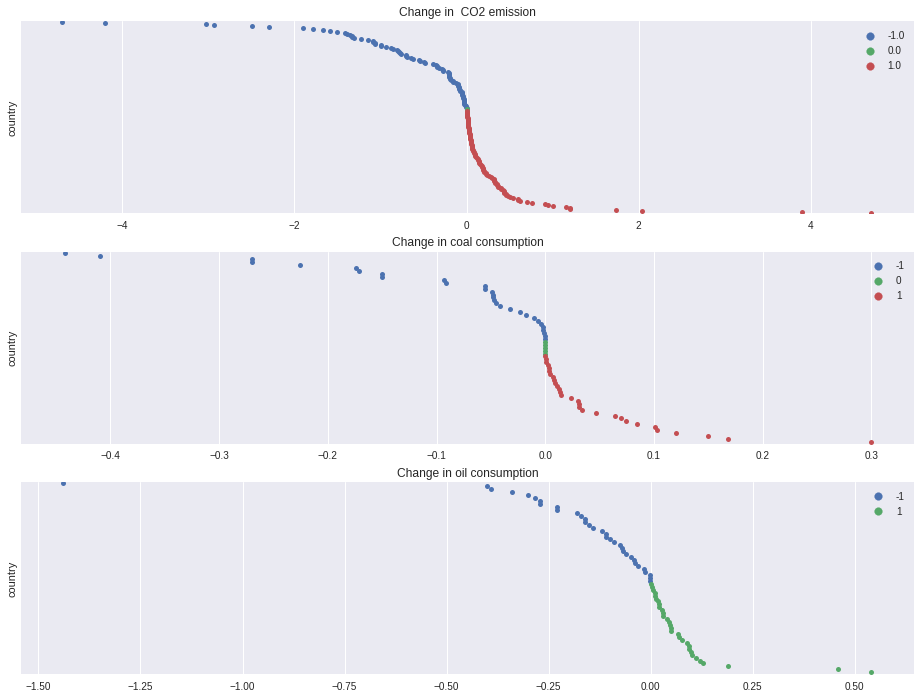

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(16, 12))
p1 = sns.swarmplot(max_change_co2.values, max_change_co2.index, hue=np.sign(max_change_co2.values), ax=ax[0])
p2 = sns.swarmplot(max_change_coal.values, max_change_coal.index, hue=np.sign(max_change_coal.values), ax=ax[1])
p3 = sns.swarmplot(max_change_oil.values, max_change_oil.index, hue=np.sign(max_change_oil.values), ax=ax[2])
ax[0].set_title('Change in  CO2 emission')
ax[1].set_title('Change in coal consumption')
ax[2].set_title('Change in oil consumption')
ax[0].get_yaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])
ax[2].get_yaxis().set_ticks([])

In [42]:
sign_dict_names, sign_dict_values = ['neg_co2', 'pos_co2', 'neg_coal', 'pos_coal', 'neg_oil', 'pos_oil'], []

neg_co2 = max_change_co2.lt(0).sum()
sign_dict_values.append(neg_co2)
sign_dict_values.append(len(max_change_co2) - neg_co2)

neg_coal = max_change_coal.lt(0).sum()
sign_dict_values.append(neg_coal)
sign_dict_values.append(len(max_change_coal) - neg_coal)

neg_oil = max_change_oil.lt(0).sum()
sign_dict_values.append(neg_oil)
sign_dict_values.append(len(max_change_oil) - neg_oil)

Text(0.5, 0.98, 'Change in CO2 emission, coal consumption and oil consumption\n(Increase shown in red)')

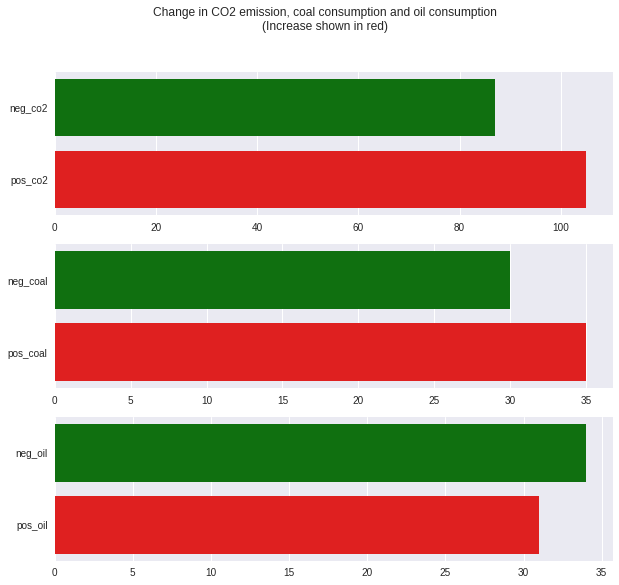

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
sns.barplot(sign_dict_values[:2], sign_dict_names[:2], ax=ax[0], palette=['g', 'r'])
sns.barplot(sign_dict_values[2:4], sign_dict_names[2:4], ax=ax[1], palette=['g', 'r'])
sns.barplot(sign_dict_values[4:], sign_dict_names[4:], ax=ax[2], palette=['g', 'r'])
fig.suptitle('Change in CO2 emission, coal consumption and oil consumption\n(Increase shown in red)')

**Conclusion:**

In most of the countries, per capita $CO_2$ emission and coal consumption has increased, while oil consumption has decreased. 

Kuwait has shown the largest decrease in $CO_2$ emission and oil consumption, while Finland has largest decrease in coal consumption. Qatar, Kazakhstan, and United Arab Emirates have the largest increase in $CO_2$ emission, coal consumption, and oil consumption respectively.

---
# 4. Trend of per capita $CO_2$ emission, Coal and Oil consumption of most populous countries

In [44]:
# top populous countries
population = ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan']

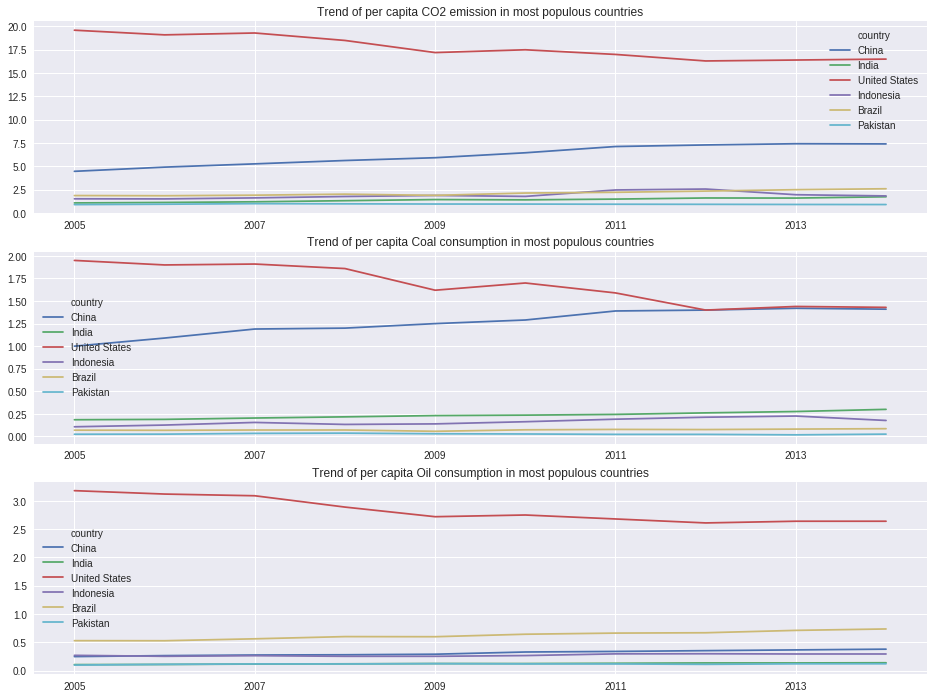

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(16, 12))
df_co2[population].plot(title='Trend of per capita CO2 emission in most populous countries', ax=ax[0])
df_coal[population].plot(title='Trend of per capita Coal consumption in most populous countries', ax=ax[1])
df_oil[population].plot(title='Trend of per capita Oil consumption in most populous countries', ax=ax[2])

**Conclusion:**

United States has far greater per capita $CO_2$ emission, coal and oil consumption compared to other populous countries. It can also be noted that China has also shown a steep rise especially in coal consumption.

---

# Limitations

*  I had to do the analysis for only the last 10 years (2005-2014) as the data for many countries was not present for earlier years. There were some missing values in the last 10 years as well.

* There were many countries in $CO_2$ dataset which were not present in coal and oil datasets. Thus, those countries had to be dropped from the analysis. This problem also showed up while calculating correlation.

---

# Final Conclusion

The above analysis clearly shows the countries having highest and lowest per capita $CO_2$ emission, coal and oil consumption and also aims at finding the correlation between them.

1. The countries having the highest *(such as United States)* or lowest *(such as India)* per capita $CO_2$ emission have shown high positive correlation with Oil consumption (in the 10-year period 2005-2014), though there are countries that have shown negative correlation especially with with coal consumption. 

2. In most of the countries, the per capita $CO_2$ emission and coal consumption has increased in the 10 years, though there are significant number of countries where it has reduced as well. The oil consumption has reduced in more countries than it has increased in 2014 from 2005.

3. Noting the analysis of most populous countires, it can be said that United States has high per capita $CO_2$ emission as well as coal and oil consumption, though it is showing a downward trend. In China, the per capita $CO_2$ emission and coal consumption has shown a sharp rise, and the oil consumption has remained nearly constant. In rest of the countries, all three have shown only a slight rise.

Although the analysis shows a majority of countries showing a positive correlation between $CO_2$ emission and oil consumption (and some with coal consumption), this analysis needs to be expanded in order to arrive at a definite conclusion e.g. by including more data as well as taking more variables into account that affect $CO_2$ emission. 

---